<a href="https://colab.research.google.com/github/sachinthadilshann/pytorch_course_by_DanielBourke/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision

## 0. Computer vision libraries in PyTorch

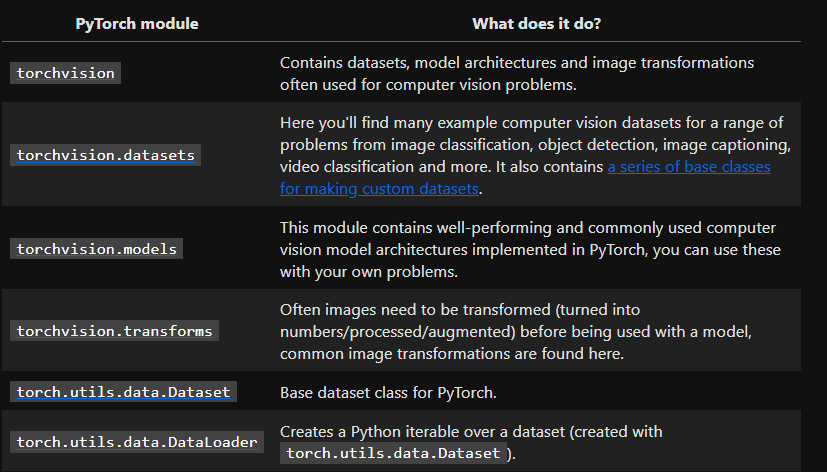

In [1]:
import torch
from torch import nn

import torchvision

from torchvision import datasets,transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.9.0+cpu
0.24.0+cpu


## 1. Getting Dataset

In [2]:
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

###1.1 Input and output shapes of a computer vision model

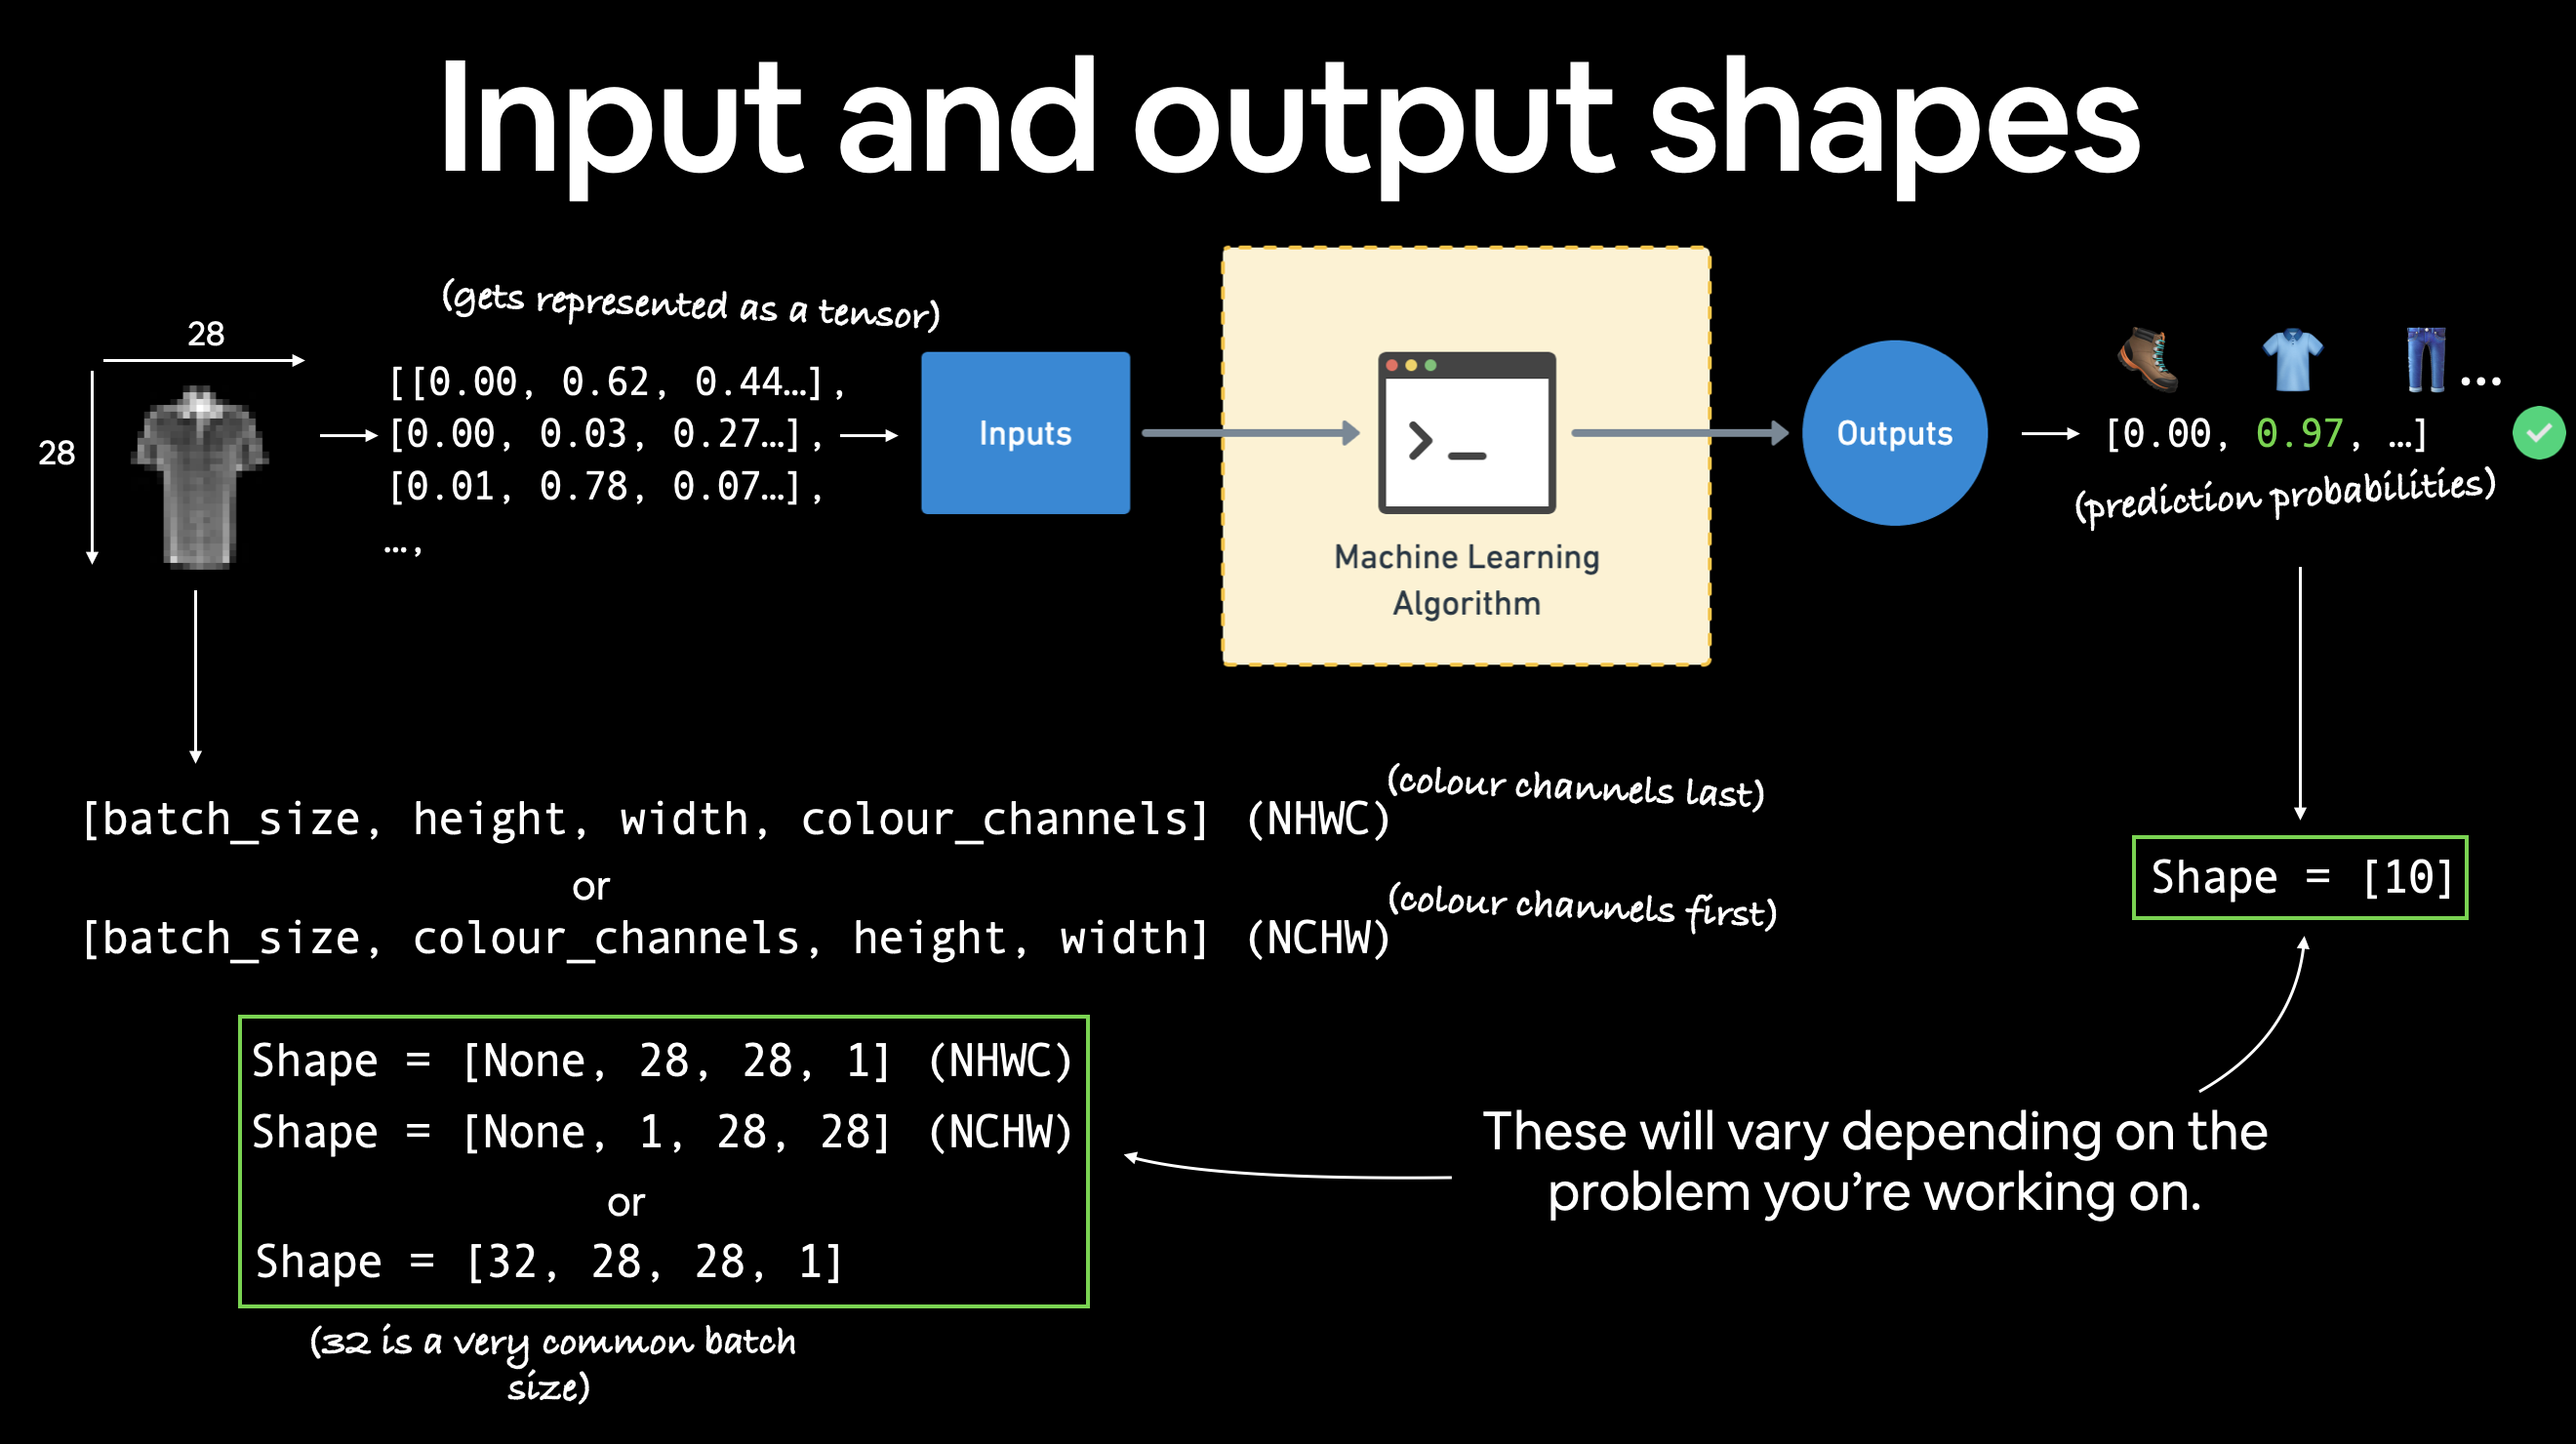

In [9]:
image.shape

torch.Size([1, 28, 28])

In [10]:
print(f"Image shape: {image.shape} -> [color channels,height,width]")
print(f"Image label : {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color channels,height,width]
Image label : Ankle boot


###1.2 Visualizing data

image shape : torch.Size([1, 28, 28])


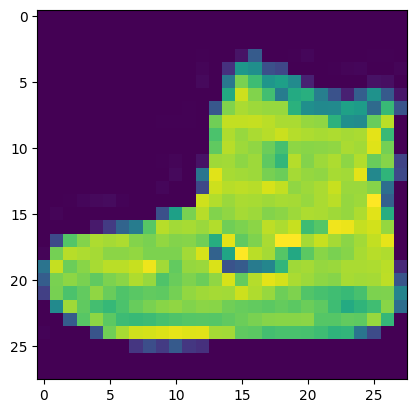

In [11]:
image, label = train_data[0]
print(f"image shape : {image.shape}")
plt.imshow(image.permute(1, 2, 0))
plt.show()

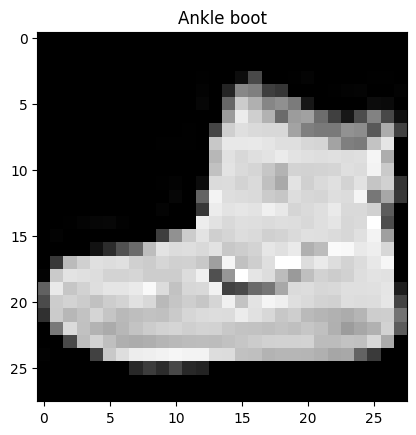

In [12]:

plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

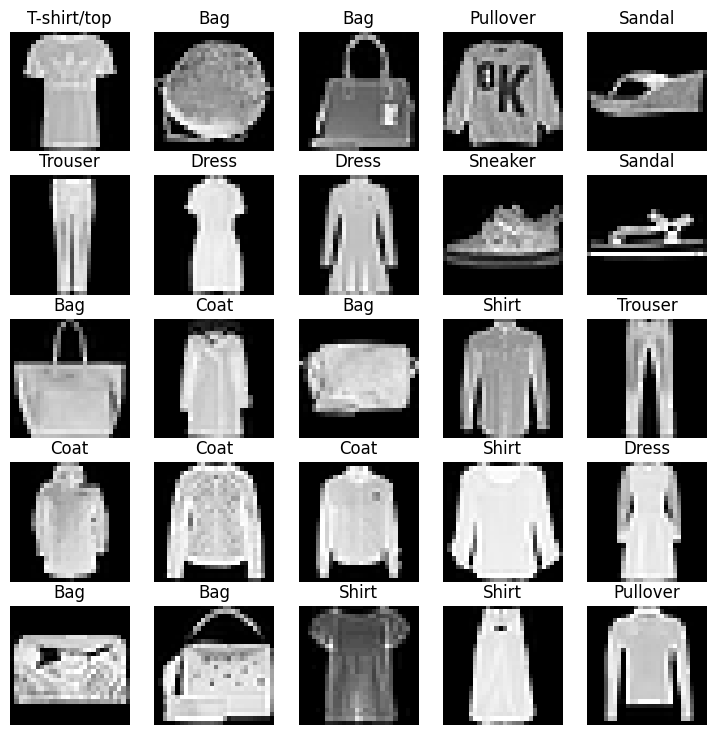

In [13]:

fig = plt.figure(figsize=(9, 9))
rows, cols = 5, 5
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

##2. Prepare DataLoader

In [14]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [15]:
 from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data,
                              batch_size = 32,
                              shuffle = True)

test_dataloader = DataLoader(test_data,
                              batch_size = 32,
                              shuffle = True)

train_dataloader ,train_dataloader



(<torch.utils.data.dataloader.DataLoader at 0x7f6463700e60>,
 <torch.utils.data.dataloader.DataLoader at 0x7f6463700e60>)

In [16]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 5, label size: torch.Size([])


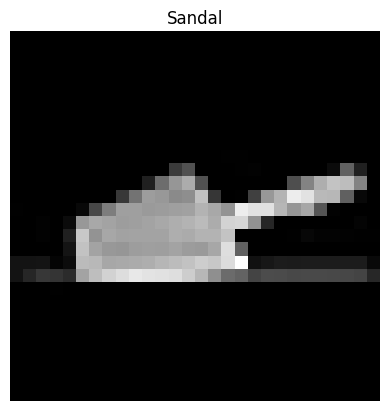

In [17]:
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

##3. Model 0: Build a baseline model

In [18]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(f"shape befoe flatten : {x.shape}")
print(f"shape after flatten : {output.shape}")



shape befoe flatten : torch.Size([1, 28, 28])
shape after flatten : torch.Size([1, 784])


In [19]:
output.shape

torch.Size([1, 784])

In [20]:
from torch import nn

class FashionMNISTV0(nn.Module):
  def __init__(self,
              input_shape:int,
              output_shape:int,
              hidden_units:int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)



In [21]:
model_0 = FashionMNISTV0(
    input_shape=784,  #28*28
    hidden_units=10,
    output_shape=len(class_names)
).to('cpu')

model_0



FashionMNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [22]:
dummy_x  = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[ 0.0097, -0.0099, -0.7276, -0.2207, -0.4973,  0.1283, -0.0553,  0.2078,
         -0.6305,  0.3250]], grad_fn=<AddmmBackward0>)

In [23]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0088,  0.0269,  0.0019,  ...,  0.0219,  0.0230,  0.0316],
                      [ 0.0172,  0.0033, -0.0089,  ...,  0.0171, -0.0284, -0.0086],
                      [ 0.0292, -0.0259,  0.0008,  ..., -0.0022, -0.0033,  0.0285],
                      ...,
                      [-0.0278, -0.0100,  0.0320,  ..., -0.0249, -0.0357,  0.0052],
                      [-0.0039,  0.0054, -0.0065,  ..., -0.0037,  0.0104, -0.0209],
                      [ 0.0218, -0.0030,  0.0075,  ...,  0.0015, -0.0106, -0.0259]])),
             ('layer_stack.1.bias',
              tensor([-0.0060, -0.0157,  0.0158, -0.0085, -0.0230,  0.0287,  0.0229, -0.0329,
                      -0.0019,  0.0288])),
             ('layer_stack.2.weight',
              tensor([[-0.0742, -0.0905,  0.1275,  0.1054, -0.2066,  0.1310,  0.1778, -0.3061,
                        0.1706,  0.2702],
                      [-0.0344,  0.2477,  0.0607, -0.0298,  0.3034, -0.2818, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

In [24]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [25]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


###
3.2 Creating a function to time our experiments

In [26]:
from timeit import default_timer as timer


def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [27]:
from IPython.utils.path import ensure_dir_exists
start_time = timer()
end_time = timer()
print_train_time(start=start_time,
                 end=end_time,
                 device="cpu")

Train time on cpu: 0.000 seconds


4.933599939249689e-05

### 3.3 Creating a training loop and training a model on batches of data

In [28]:
from tqdm.auto import tqdm

print_train_time_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epochs: {epochs}\n----")

  train_loss = 0

  for batch ,(X,y) in enumerate(train_dataloader):
    model_0.train()

    y_pred = model_0(X)
    loss = loss_fn(y_pred,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader)

  #testing

  test_loss,test_acc = 0,0
  model_0.eval()

  with torch.inference_mode():
    for X_test,y_test in test_dataloader:

      #forwardpass
      test_pred = model_0(X_test)

      #calculate loss
      test_loss += loss_fn(test_pred,y_test)

      #calculate accuracy

      test_acc += loss_fn(test_pred,y_test)

      test_acc += accuracy_fn(y_test,test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.5f}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 3
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.00000 | Test loss: 0.50616 | Test acc: 82.57481
Epochs: 3
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.00000 | Test loss: 0.51114 | Test acc: 82.54989
Epochs: 3
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.00000 | Test loss: 0.49189 | Test acc: 83.28945


##4. Make Predictions and get Model 0 Results

In [29]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:

            y_pred = model(X)


            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)


        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}


model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.4918758273124695,
 'model_acc': 82.78753993610223}

##5. Setup device dagnostic-code

In [30]:
torch.cuda.is_available()

False

In [31]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [32]:
import torch

device  = "cuda"  if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Model 1 : Building a better non-linear model

In [33]:
class FashionMNISTV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )
  def forward(self,x):
    return self.layer_stack(x)

In [34]:
model_1 = FashionMNISTV1(input_shape=784,
                         hidden_units=10,
                         output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cpu')

###6.1 Setup loss,Optimizer and Evaluation Metrics

In [35]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

###6.2 Functionizing training and evaluation loss

In [48]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  train_loss,train_acc = 0,0

  model.to(device)


  for batch,(X,y) in enumerate(data_loader):
    X,y = X.to(device),y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred,y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.5f}")



In [49]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:

            X, y = X.to(device), y.to(device)


            test_pred = model(X)


            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [50]:
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epochs: {epochs}\n----")
  train_step(model_1,
             data_loader=train_dataloader,
             loss_fn = loss_fn ,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn)


  test_step(data_loader=test_dataloader,
            model=model_1,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)



  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 3
----
Train loss: 0.73358 | Train acc: 74.45333
Test loss: 0.60104 | Test accuracy: 77.77%

Epochs: 3
----
Train loss: 0.48400 | Train acc: 82.68667
Test loss: 0.46977 | Test accuracy: 83.22%

Epochs: 3
----
Train loss: 0.45066 | Train acc: 83.95667
Test loss: 0.47479 | Test accuracy: 82.96%



In [52]:
model_0_results

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.4918758273124695,
 'model_acc': 82.78753993610223}

In [51]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTV1',
 'model_loss': 0.47397562861442566,
 'model_acc': 82.96725239616613}